In [4]:
import pandas as pd
import random


In [9]:
l = []
for i in range(1,10001):
  l.append(random.randint(1,6))

In [16]:
p = pd.Series(l).value_counts().sort_index()
p.plot(kind="bar")

In [19]:
l = []
for i in range(1,10001):
  a = random.randint(1,6)
  b = random.randint(1,6)
  l.append(a+b)

<Axes: >

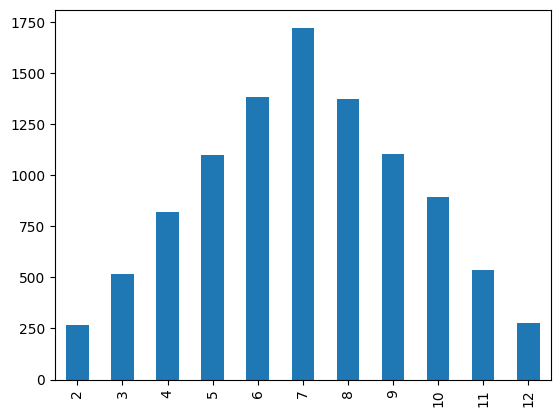

In [20]:
ans = pd.Series(l).value_counts().sort_index()
ans.plot(kind="bar")

**Parametric density Estimator**

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
import seaborn as sns

In [25]:
sample = normal(loc=50 , scale = 5 , size=1000)
sample.mean()

np.float64(50.16072418960799)

(array([  1.,   1.,   0.,   7.,   6.,  27.,  35.,  70.,  91., 130., 128.,
        139., 120.,  93.,  60.,  45.,  27.,   8.,   9.,   3.]),
 array([31.3894524 , 33.0898689 , 34.79028539, 36.49070189, 38.19111838,
        39.89153488, 41.59195137, 43.29236787, 44.99278436, 46.69320086,
        48.39361735, 50.09403385, 51.79445034, 53.49486684, 55.19528333,
        56.89569983, 58.59611632, 60.29653282, 61.99694931, 63.69736581,
        65.3977823 ]),
 <BarContainer object of 20 artists>)

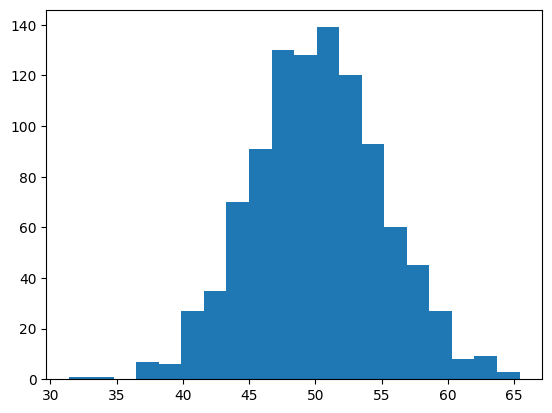

In [27]:
plt.hist(sample , bins=20)

In [28]:
sample_mean = sample.mean()
sample_std = sample.std()

In [29]:
# Fitting distribution with above parameter
from scipy.stats import norm
dist = norm(sample_mean , sample_std)
values=np.linspace(sample.min(),sample.max(), 100)


In [30]:
sample.max()

np.float64(65.39778230412405)

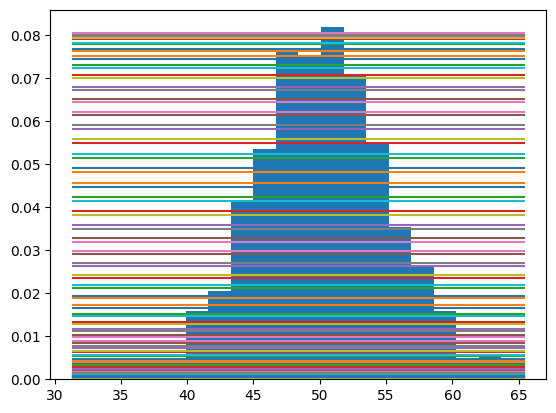

In [35]:
prob = [dist.pdf(values) for val in values]
plt.hist(sample , bins = 20 , density=True)
plt.plot(values , prob)
plt.show()

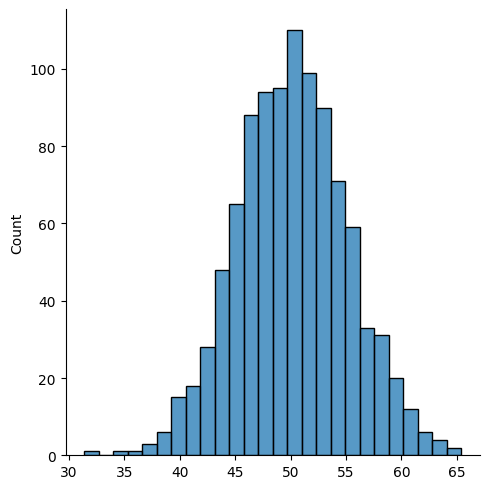

In [36]:
import seaborn as sns
sns.displot(sample)

In [37]:
# KDE

In [38]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))


(array([ 2.,  2.,  3.,  3., 11.,  7.,  8., 12., 10., 21., 25., 21., 29.,
        18., 17., 26., 20., 16., 21., 13., 10.,  8.,  9.,  2.,  8., 14.,
        14., 15., 28., 34., 40., 53., 47., 59., 56., 43., 50., 40., 48.,
        43., 19., 26., 19.,  9.,  8.,  4.,  3.,  1.,  2.,  3.]),
 array([ 7.76262992,  8.69999919,  9.63736845, 10.57473772, 11.51210698,
        12.44947624, 13.38684551, 14.32421477, 15.26158404, 16.1989533 ,
        17.13632257, 18.07369183, 19.0110611 , 19.94843036, 20.88579962,
        21.82316889, 22.76053815, 23.69790742, 24.63527668, 25.57264595,
        26.51001521, 27.44738448, 28.38475374, 29.322123  , 30.25949227,
        31.19686153, 32.1342308 , 33.07160006, 34.00896933, 34.94633859,
        35.88370786, 36.82107712, 37.75844638, 38.69581565, 39.63318491,
        40.57055418, 41.50792344, 42.44529271, 43.38266197, 44.32003124,
        45.2574005 , 46.19476976, 47.13213903, 48.06950829, 49.00687756,
        49.94424682, 50.88161609, 51.81898535, 52.75635461,

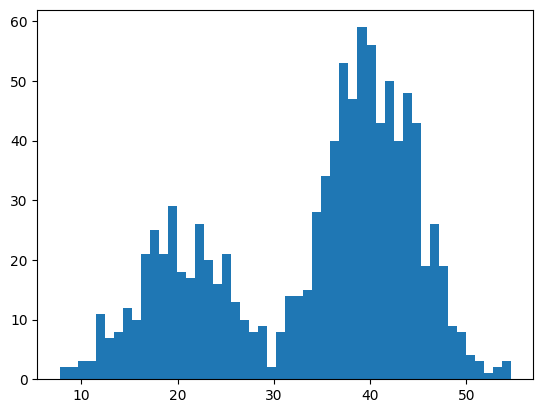

In [41]:
plt.hist(sample,bins=50)

In [39]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')
# convert data to 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)


KernelDensity(bandwidth=3)

In [42]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

probabilities = model.score_samples(values)
probabilities = np.exp(probabilities) # bec log me hota h


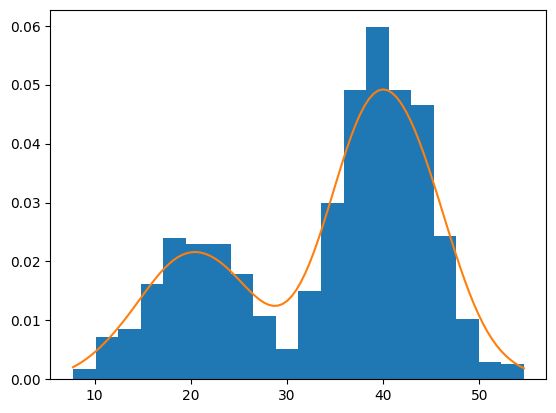

In [43]:
plt.hist(sample , bins=20 , density=True)
plt.plot(values[:] , probabilities)
plt.show()